In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas geopandas contextily matplotlib mgwr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 84.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import geopandas as gpd
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
# Corrected import - bisquare is a method of the Kernel class
from mgwr.kernels import Kernel
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx
import mgwr.kernels
print(dir(mgwr.kernels))

['Kernel', '__author__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'local_cdist', 'njit', 'np']


In [ ]:
# Replace 'path/to/your/file.csv' with the actual path to your data file in Google Drive
df = pd.read_csv('/content/drive/MyDrive/DIMAS_TI/Datasets DIMAS TI.csv')
df_koor = pd.read_excel('/content/drive/MyDrive/DIMAS_TI/koordinat.xlsx')

In [ ]:
df_koor_38 = df_koor.head(38).copy()
display(df_koor_38.head())

,kabupaten/kota,latitude,longitude
0,Kab. Pacitan,-8.1961,111.0991
1,Kab. Ponorogo,-7.8703,111.4667
2,Kab. Trenggalek,-8.0569,111.7145
3,Kab. Tulungagung,-8.0654,111.9023
4,Kab. Blitar,-8.0982,112.1643


In [ ]:
len(df_koor_38)

38

In [ ]:
df_2024 = df[df['Tahun'] == 2024].copy()
display(df_2024.head())

,Kabupaten/Kota,Tahun,Latitude,Longitude,Luas Wilayah,Indeks Pembangunan Manusia (IPM),Harapan Lama Sekolah (Tahun),Rata-rata Lama sekolah (Tahun),Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen),Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen),...,Jumlah Penerima Bansos,Jumlah Sekolah SMA (Negeri + Swasta),Jumlah Guru SMA (Negeri + Swasta),Jumlah Murid SMA (Negeri + Swasta),Jumlah Sekolah SMP (Negeri + Swasta),Jumlah Guru SMP (Negeri + Swasta),Jumlah Murid SMP (Negeri + Swasta),Jumlah Sekolah SD (Negeri + Swasta),Jumlah Guru SD (Negeri + Swasta),Jumlah Murid SD (Negeri + Swasta)
152,Pacitan,2024,-81.961,1.110.991,1389.92,70.94,12.69,7.88,99.55,96.64,...,2059,10,315,4207,71,1185,15403,419,3775.0,31903.0
153,Ponorogo,2024,-78.703,1.114.667,1305.70,73.18,13.78,7.78,98.47,99.33,...,1101,25,757,10718,90,1499,23549,571,4421.0,47531.0
154,Trenggalek,2024,-80.569,1.117.145,1147.22,71.96,12.63,7.90,99.38,98.85,...,3174,16,526,8323,83,1431,22299,438,3644.0,39613.0
155,Tulungagung,2024,-80.654,1.119.023,1055.65,74.65,13.36,8.66,99.60,99.91,...,691,23,810,14262,104,2444,37366,632,6397.0,63208.0
156,Blitar,2024,-80.969,1.121.678,1336.48,72.84,12.67,7.83,99.53,97.53,...,821,23,549,9168,107,2197,33817,666,6000.0,61133.0


In [ ]:
len(df_2024)

38

In [ ]:
df_2024.columns

Index(['Kabupaten/Kota', 'Tahun', 'Latitude', 'Longitude', 'Luas Wilayah',
       'Indeks Pembangunan Manusia (IPM)', 'Harapan Lama Sekolah (Tahun)',
       'Rata-rata Lama sekolah (Tahun)',
       'Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen)',
       'Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen)',
       'Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen)',
       'Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen)',
       'Rasio Guru per Siswa', 'Persentase Penduduk Miskin (Persen)',
       'Tingkat Pengangguran Terbuka (TPT) - Agustus',
       'Tingkat Partisipasi Angkatan Kerja - Agustus',
       'Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah)',
       'Persentase Rumah Tangga dengan Akses Air Bersih',
       'Kepadatan Penduduk per km persegi (km²)', 'Gini Ratio',
       'Jumlah masyarakat miskin \ndan tidak mampu yang dapat\nmengakses pelayanan kesehatan (orang)',
       'Jumlah Penerima Bansos', 'Jumlah Sekolah SMA (Negeri + Swasta)',
       'Jumlah Guru 

In [ ]:
df_2024.describe()

,Tahun,Latitude,Luas Wilayah,Indeks Pembangunan Manusia (IPM),Harapan Lama Sekolah (Tahun),Rata-rata Lama sekolah (Tahun),Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen),Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen),Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen),Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen),...,Jumlah Penerima Bansos,Jumlah Sekolah SMA (Negeri + Swasta),Jumlah Guru SMA (Negeri + Swasta),Jumlah Murid SMA (Negeri + Swasta),Jumlah Sekolah SMP (Negeri + Swasta),Jumlah Guru SMP (Negeri + Swasta),Jumlah Murid SMP (Negeri + Swasta),Jumlah Sekolah SD (Negeri + Swasta),Jumlah Guru SD (Negeri + Swasta),Jumlah Murid SD (Negeri + Swasta)
count,38.0,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,2024.0,-76.522289,1257.986579,74.682105,13.581842,8.375526,99.312105,97.891579,78.537105,22.159737,...,2088.789474,39.894737,920.710526,14718.789474,132.842105,2102.315789,32689.763158,499.342105,4787.894737,65836.631579
std,0.0,3.806086,1108.687220,4.711228,0.902986,1.658403,0.599230,2.276492,10.026940,9.052400,...,1693.735455,28.836716,593.351357,10023.328328,93.101667,1295.746057,22610.446302,259.479341,2488.316252,45500.590677
min,2024.0,-82.163000,20.210000,66.190000,11.980000,5.070000,97.860000,90.740000,53.300000,10.750000,...,14.000000,10.000000,245.000000,4207.000000,19.000000,513.000000,8187.000000,55.000000,735.000000,11268.000000
25%,2024.0,-79.534250,647.995000,71.055000,12.915000,7.410000,98.975000,96.710000,70.285000,15.317500,...,856.500000,16.500000,531.750000,8453.500000,73.500000,1277.500000,17739.500000,408.500000,3784.500000,36195.250000
50%,2024.0,-76.483000,1207.750000,73.905000,13.495000,7.925000,99.525000,98.780000,81.910000,20.285000,...,1987.000000,29.500000,844.500000,13332.000000,112.500000,1965.500000,30405.500000,540.000000,4878.500000,60304.000000
75%,2024.0,-74.143750,1633.895000,77.957500,14.017500,9.725000,99.762500,99.917500,85.327500,27.287500,...,2999.250000,59.500000,1192.000000,17832.000000,175.250000,2513.750000,36999.750000,635.500000,6126.000000,73038.250000
max,2024.0,-68.953000,5782.400000,84.000000,15.790000,11.820000,99.990000,99.990000,94.580000,50.330000,...,8991.000000,139.000000,3383.000000,57683.000000,359.000000,6387.000000,105586.000000,1157.000000,11424.000000,213412.000000


In [ ]:
from sklearn.linear_model import LinearRegression

# Identify columns with missing values that need to be imputed
cols_to_impute = ['Jumlah Guru SD (Negeri + Swasta)', 'Jumlah Murid SD (Negeri + Swasta)']

# Create a copy of the DataFrame to work with
# df_2024 = df.copy()

# Get unique districts
districts = df_2024['Kabupaten/Kota'].unique()

# Iterate through each district
for district in districts:
    df_district = df_2024[df_2024['Kabupaten/Kota'] == district].copy()

    # Iterate through each column to impute
    for col in cols_to_impute:
        # Filter out rows with missing values for the current column
        df_train = df_district.dropna(subset=[col])

        # If there's enough data to train a model (at least 2 data points)
        if len(df_train) >= 2:
            X_train = df_train[['Tahun']]
            y_train = df_train[col]

            # Train a linear regression model
            model = LinearRegression()
            model.fit(X_train, y_train)

            # Predict for years with missing values in the current district
            df_predict = df_district[df_district[col].isnull()].copy()
            if not df_predict.empty:
                X_predict = df_predict[['Tahun']]
                y_predict = model.predict(X_predict)

                # Fill the missing values with predictions
                df_2024.loc[df_predict.index, col] = y_predict

# Display the updated DataFrame info and check for remaining missing values
print("DataFrame after imputation and recalculation:")
display(df_2024.info())
print("\nMissing values after imputation:")
display(df_2024.isnull().sum())

DataFrame after imputation and recalculation:
<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 152 to 189
Data columns (total 31 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Kabupaten/Kota                                                                              38 non-null     object 
 1   Tahun                                                                                       38 non-null     int64  
 2   Latitude                                                                                    38 non-null     float64
 3   Longitude                                                                                   38 non-null     object 
 4   Luas Wilayah                                                                                38 non-null     float64
 5   I

None


Missing values after imputation:


,0
Kabupaten/Kota,0
Tahun,0
Latitude,0
Longitude,0
Luas Wilayah,0
Indeks Pembangunan Manusia (IPM),0
Harapan Lama Sekolah (Tahun),0
Rata-rata Lama sekolah (Tahun),0
Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen),0
Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen),0


In [ ]:
df_2024['Rasio Guru SD'] = df_2024['Jumlah Guru SD (Negeri + Swasta)'] / df_2024['Jumlah Murid SD (Negeri + Swasta)']
df_2024['Rasio Guru SMP'] = df_2024['Jumlah Guru SMP (Negeri + Swasta)'] / df_2024['Jumlah Murid SMP (Negeri + Swasta)']
df_2024['Rasio Guru SMA'] = df_2024['Jumlah Guru SMA (Negeri + Swasta)'] / df_2024['Jumlah Murid SMA (Negeri + Swasta)']

df_2024['APS_Pendidikan_Dasar_Menengah'] = (df_2024['Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen)'] + df_2024['Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen)'] + df_2024['Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen)']) / 3

df_2024['BebanSiswaPerSekolah_SD'] = df_2024['Jumlah Murid SD (Negeri + Swasta)'] / df_2024['Jumlah Sekolah SD (Negeri + Swasta)']
df_2024['BebanSiswaPerSekolah_SMP'] = df_2024['Jumlah Murid SMP (Negeri + Swasta)'] / df_2024['Jumlah Sekolah SMP (Negeri + Swasta)']
df_2024['BebanSiswaPerSekolah_SMA'] = df_2024['Jumlah Murid SMA (Negeri + Swasta)'] / df_2024['Jumlah Sekolah SMA (Negeri + Swasta)']

df_2024['TingkatTransisi_SD_SMP'] = df_2024['Jumlah Murid SMP (Negeri + Swasta)'] / df_2024['Jumlah Murid SD (Negeri + Swasta)']
df_2024['TingkatTransisi_SMP_SMA'] = df_2024['Jumlah Murid SMA (Negeri + Swasta)'] / df_2024['Jumlah Murid SMP (Negeri + Swasta)']

df_2024['KesenjanganPendidikan'] = df_2024['Harapan Lama Sekolah (Tahun)'] - df_2024['Rata-rata Lama sekolah (Tahun)']

df_2024['IndeksDayaDukungEkonomi'] = df_2024['Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah)'] / df_2024['Persentase Penduduk Miskin (Persen)']

In [ ]:
df_2024.head()

,Kabupaten/Kota,Tahun,Latitude,Longitude,Luas Wilayah,Indeks Pembangunan Manusia (IPM),Harapan Lama Sekolah (Tahun),Rata-rata Lama sekolah (Tahun),Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen),Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen),...,Rasio Guru SMP,Rasio Guru SMA,APS_Pendidikan_Dasar_Menengah,BebanSiswaPerSekolah_SD,BebanSiswaPerSekolah_SMP,BebanSiswaPerSekolah_SMA,TingkatTransisi_SD_SMP,TingkatTransisi_SMP_SMA,KesenjanganPendidikan,IndeksDayaDukungEkonomi
152,Pacitan,2024,-81.961,1.110.991,1389.92,70.94,12.69,7.88,99.55,96.64,...,0.076933,0.074875,93.666667,76.140811,216.943662,420.700000,0.482807,0.273129,4.81,740.137615
153,Ponorogo,2024,-78.703,1.114.667,1305.70,73.18,13.78,7.78,98.47,99.33,...,0.063655,0.070629,93.880000,83.241681,261.655556,428.720000,0.495445,0.455136,6.00,1169.923161
154,Trenggalek,2024,-80.569,1.117.145,1147.22,71.96,12.63,7.90,99.38,98.85,...,0.064173,0.063198,93.123333,90.440639,268.662651,520.187500,0.562921,0.373245,4.73,996.666667
155,Tulungagung,2024,-80.654,1.119.023,1055.65,74.65,13.36,8.66,99.60,99.91,...,0.065407,0.056794,93.850000,100.012658,359.288462,620.086957,0.591159,0.381684,4.70,1841.560510
156,Blitar,2024,-80.969,1.121.678,1336.48,72.84,12.67,7.83,99.53,97.53,...,0.064967,0.059882,90.243333,91.791291,316.046729,398.608696,0.553171,0.271106,4.84,1409.191176


In [ ]:
dfgwr = df_2024.copy()

In [ ]:
dfgwr.drop(columns=['Jumlah Guru SD (Negeri + Swasta)', 'Jumlah Murid SD (Negeri + Swasta)', 'Jumlah Guru SMP (Negeri + Swasta)', 'Jumlah Murid SMP (Negeri + Swasta)',
                 'Jumlah Guru SMA (Negeri + Swasta)', 'Jumlah Murid SMA (Negeri + Swasta)', 'Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen)', 'Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen)',
                 'Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen)', 'Jumlah Sekolah SD (Negeri + Swasta)', 'Jumlah Sekolah SMP (Negeri + Swasta)', 'Jumlah Sekolah SMA (Negeri + Swasta)',
                 'Harapan Lama Sekolah (Tahun)', 'Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah)', 'Persentase Penduduk Miskin (Persen)', 'Harapan Lama Sekolah (Tahun)', 'Rata-rata Lama sekolah (Tahun)'], inplace=True, axis=1)

dfgwr.head()

,Kabupaten/Kota,Tahun,Latitude,Longitude,Luas Wilayah,Indeks Pembangunan Manusia (IPM),Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen),Rasio Guru per Siswa,Tingkat Pengangguran Terbuka (TPT) - Agustus,Tingkat Partisipasi Angkatan Kerja - Agustus,...,Rasio Guru SMP,Rasio Guru SMA,APS_Pendidikan_Dasar_Menengah,BebanSiswaPerSekolah_SD,BebanSiswaPerSekolah_SMP,BebanSiswaPerSekolah_SMA,TingkatTransisi_SD_SMP,TingkatTransisi_SMP_SMA,KesenjanganPendidikan,IndeksDayaDukungEkonomi
152,Pacitan,2024,-81.961,1.110.991,1389.92,70.94,10.75,9.22,1.83,81.64,...,0.076933,0.074875,93.666667,76.140811,216.943662,420.700000,0.482807,0.273129,4.81,740.137615
153,Ponorogo,2024,-78.703,1.114.667,1305.70,73.18,20.80,11.94,4.66,75.88,...,0.063655,0.070629,93.880000,83.241681,261.655556,428.720000,0.495445,0.455136,6.00,1169.923161
154,Trenggalek,2024,-80.569,1.117.145,1147.22,71.96,13.52,12.07,4.52,80.72,...,0.064173,0.063198,93.123333,90.440639,268.662651,520.187500,0.562921,0.373245,4.73,996.666667
155,Tulungagung,2024,-80.654,1.119.023,1055.65,74.65,22.07,11.93,5.65,74.70,...,0.065407,0.056794,93.850000,100.012658,359.288462,620.086957,0.591159,0.381684,4.70,1841.560510
156,Blitar,2024,-80.969,1.121.678,1336.48,72.84,14.92,12.63,4.91,73.50,...,0.064967,0.059882,90.243333,91.791291,316.046729,398.608696,0.553171,0.271106,4.84,1409.191176


In [ ]:
# Tentukan jalur lengkap untuk menyimpan file CSV di Google Drive
output_path = '/content/drive/MyDrive/DIMAS_TI/dfgwr_data.csv'

# Simpan DataFrame ke file CSV
dfgwr.to_csv(output_path, index=False)

print(f"DataFrame dfgwr berhasil disimpan ke: {output_path}")

DataFrame dfgwr berhasil disimpan ke: /content/drive/MyDrive/DIMAS_TI/dfgwr_data.csv


In [ ]:
len(dfgwr)

38

In [ ]:
dfgwr.isnull().sum()

,0
Kabupaten/Kota,0
Tahun,0
Latitude,0
Longitude,0
Luas Wilayah,0
Indeks Pembangunan Manusia (IPM),0
Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen),0
Rasio Guru per Siswa,0
Tingkat Pengangguran Terbuka (TPT) - Agustus,0
Tingkat Partisipasi Angkatan Kerja - Agustus,0


In [ ]:
dfgwr.columns

Index(['Kabupaten/Kota', 'Tahun', 'Latitude', 'Longitude', 'Luas Wilayah',
       'Indeks Pembangunan Manusia (IPM)',
       'Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen)',
       'Rasio Guru per Siswa', 'Tingkat Pengangguran Terbuka (TPT) - Agustus',
       'Tingkat Partisipasi Angkatan Kerja - Agustus',
       'Persentase Rumah Tangga dengan Akses Air Bersih',
       'Kepadatan Penduduk per km persegi (km²)', 'Gini Ratio',
       'Jumlah masyarakat miskin \ndan tidak mampu yang dapat\nmengakses pelayanan kesehatan (orang)',
       'Jumlah Penerima Bansos', 'Rasio Guru SD', 'Rasio Guru SMP',
       'Rasio Guru SMA', 'APS_Pendidikan_Dasar_Menengah',
       'BebanSiswaPerSekolah_SD', 'BebanSiswaPerSekolah_SMP',
       'BebanSiswaPerSekolah_SMA', 'TingkatTransisi_SD_SMP',
       'TingkatTransisi_SMP_SMA', 'KesenjanganPendidikan',
       'IndeksDayaDukungEkonomi'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select columns to normalize
cols_to_normalize = dfgwr.columns.drop(['Tahun', 'Kabupaten/Kota', 'Longitude', 'Latitude', 'Indeks Pembangunan Manusia (IPM)']).tolist()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to the selected columns
dfgwr[cols_to_normalize] = scaler.fit_transform(dfgwr[cols_to_normalize])

print("DataFrame after normalization:")
display(dfgwr.head())

DataFrame after normalization:


,Kabupaten/Kota,Tahun,Latitude,Longitude,Luas Wilayah,Indeks Pembangunan Manusia (IPM),Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen),Rasio Guru per Siswa,Tingkat Pengangguran Terbuka (TPT) - Agustus,Tingkat Partisipasi Angkatan Kerja - Agustus,...,Rasio Guru SMP,Rasio Guru SMA,APS_Pendidikan_Dasar_Menengah,BebanSiswaPerSekolah_SD,BebanSiswaPerSekolah_SMP,BebanSiswaPerSekolah_SMA,TingkatTransisi_SD_SMP,TingkatTransisi_SMP_SMA,KesenjanganPendidikan,IndeksDayaDukungEkonomi
152,Pacitan,2024,-81.961,1.110.991,0.237706,70.94,0.000000,0.180884,0.018927,1.000000,...,0.380035,0.692024,0.714104,0.000000,0.349410,0.528136,0.389725,0.003416,0.423935,0.066927
153,Ponorogo,2024,-78.703,1.114.667,0.223091,73.18,0.253916,0.460432,0.465300,0.609492,...,0.199331,0.577168,0.727678,0.028214,0.474452,0.543844,0.421364,0.310842,0.665314,0.165895
154,Trenggalek,2024,-80.569,1.117.145,0.195587,71.96,0.069985,0.473792,0.443218,0.937627,...,0.206391,0.376189,0.679533,0.056817,0.494048,0.722984,0.590295,0.172521,0.407708,0.125999
155,Tulungagung,2024,-80.654,1.119.023,0.179696,74.65,0.286003,0.459404,0.621451,0.529492,...,0.223181,0.202972,0.725769,0.094850,0.747493,0.918638,0.660990,0.186775,0.401623,0.320555
156,Blitar,2024,-80.969,1.121.678,0.228432,72.84,0.105356,0.531346,0.504732,0.448136,...,0.217197,0.286494,0.496288,0.062184,0.626563,0.484870,0.565884,0.000000,0.430020,0.220992


In [ ]:
X = dfgwr.drop(columns=['Tahun', 'Kabupaten/Kota', 'TingkatTransisi_SMP_SMA', 'Longitude', 'Latitude', 'Indeks Pembangunan Manusia (IPM)'], axis=1)
y = dfgwr['TingkatTransisi_SMP_SMA'].values.reshape((-1, 1))

X = np.hstack([np.ones(y.shape), X])

In [ ]:
X

array([[1.00000000e+00, 2.37706497e-01, 0.00000000e+00, 1.80883864e-01,
        1.89274448e-02, 1.00000000e+00, 4.48408872e-02, 0.00000000e+00,
        7.51552795e-01, 2.82392027e-01, 2.27804389e-01, 9.85171315e-01,
        3.80034774e-01, 6.92023617e-01, 7.14103924e-01, 0.00000000e+00,
        3.49409966e-01, 5.28136374e-01, 3.89724960e-01, 4.23935091e-01,
        6.69268693e-02],
       [1.00000000e+00, 2.23090526e-01, 2.53916119e-01, 4.60431655e-01,
        4.65299685e-01, 6.09491525e-01, 7.30954677e-01, 3.23398093e-02,
        7.49252358e-01, 1.26245847e-01, 1.21087223e-01, 6.00292326e-01,
        1.99331435e-01, 5.77168417e-01, 7.27677625e-01, 2.82137697e-02,
        4.74451669e-01, 5.43843642e-01, 4.21364411e-01, 6.65314402e-01,
        1.65894779e-01],
       [1.00000000e+00, 1.95587094e-01, 6.99848408e-02, 4.73792395e-01,
        4.43217666e-01, 9.37627119e-01, 2.70491803e-01, 2.23241221e-02,
        1.15021854e-04, 2.99003322e-02, 3.52010694e-01, 5.84739049e-01,
        2.0639

In [ ]:
# # Convert Longitude and Latitude to numeric, coercing errors to NaN
# df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
# df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')

# # Drop rows where conversion resulted in NaN (if any)
# df.dropna(subset=['Longitude', 'Latitude'], inplace=True)

u = df_koor_38['longitude'].values
v = df_koor_38['latitude'].values
coords = list(zip(u, v))

In [ ]:
df_koor['longitude']

,longitude
0,111.0991
1,111.4667
2,111.7145
3,111.9023
4,112.1643
...,...
185,112.9068
186,112.4338
187,111.5262
188,112.7521


In [ ]:
u

array([111.0991, 111.4667, 111.7145, 111.9023, 112.1643, 112.0121,
       112.6268, 113.2212, 113.7022, 114.3684, 113.8201, 114.0108,
       113.2165, 112.9075, 112.7183, 112.4349, 112.2325, 111.9033,
       111.5233, 111.3269, 111.4428, 111.8893, 112.0402, 112.4168,
       112.6531, 112.9339, 113.2458, 113.4764, 113.8661, 112.0125,
       112.1678, 112.6326, 113.2166, 112.9068, 112.4338, 111.5262,
       112.7521, 112.5259])

In [ ]:
coords

[(np.float64(111.0991), np.float64(-8.1961)),
 (np.float64(111.4667), np.float64(-7.8703)),
 (np.float64(111.7145), np.float64(-8.0569)),
 (np.float64(111.9023), np.float64(-8.0654)),
 (np.float64(112.1643), np.float64(-8.0982)),
 (np.float64(112.0121), np.float64(-7.8229)),
 (np.float64(112.6268), np.float64(-8.1585)),
 (np.float64(113.2212), np.float64(-8.1326)),
 (np.float64(113.7022), np.float64(-8.1694)),
 (np.float64(114.3684), np.float64(-8.2163)),
 (np.float64(113.8201), np.float64(-7.9139)),
 (np.float64(114.0108), np.float64(-7.7051)),
 (np.float64(113.2165), np.float64(-7.7465)),
 (np.float64(112.9075), np.float64(-7.6439)),
 (np.float64(112.7183), np.float64(-7.4449)),
 (np.float64(112.4349), np.float64(-7.4691)),
 (np.float64(112.2325), np.float64(-7.5459)),
 (np.float64(111.9033), np.float64(-7.6033)),
 (np.float64(111.5233), np.float64(-7.6289)),
 (np.float64(111.3269), np.float64(-7.6521)),
 (np.float64(111.4428), np.float64(-7.4042)),
 (np.float64(111.8893), np.float64

In [ ]:
coords = np.array(coords)
print(f"Bentuk coords: {coords.shape}")

Bentuk coords: (38, 2)


In [ ]:
print("--- Memverifikasi Bentuk Data ---")
print(f"Bentuk y: {y.shape}")
print(f"Bentuk X: {X.shape}")
print(f"Bentuk coords: {coords.shape}")
print("Pastikan angka pertama dari ketiga bentuk di atas adalah 38!\n")

--- Memverifikasi Bentuk Data ---
Bentuk y: (38, 1)
Bentuk X: (38, 21)
Bentuk coords: (38, 2)
Pastikan angka pertama dari ketiga bentuk di atas adalah 38!



In [ ]:
len(y)

38

In [ ]:
print("\nMencari bandwidth optimal dengan kriteria AICc untuk kernel adaptif...")

# Membuat objek untuk Seleksi Bandwidth
# adaptive=True -> kita mencari jumlah tetangga terdekat, bukan jarak tetap
# kernel='bisquare' -> bentuk fungsi bobot yang umum digunakan
selector_final = Sel_BW(coords, y, X, kernel='bisquare', fixed=False)

# Melakukan pencarian bandwidth. Ini mungkin memakan waktu beberapa saat.
# criterion='AICc' -> kita menyuruhnya mencari bandwidth yang meminimalkan nilai AICc
# Set bw_max to the number of data points to avoid the out of bounds error
bw_final = selector_final.search(criterion='AICc',bw_min=(X.shape[1]), bw_max=len(y))

print(f"Bandwidth Optimal (jumlah tetangga) yang ditemukan: {int(bw_final)}")


Mencari bandwidth optimal dengan kriteria AICc untuk kernel adaptif...
Bandwidth Optimal (jumlah tetangga) yang ditemukan: 27


In [ ]:
# Membuat objek GWR dengan bandwidth optimal dan kernel bisquare adaptif
gwr_model = GWR(coords, y, X, bw=bw_final, kernel='bisquare', fixed=False)

# Menjalankan model GWR
gwr_results1 = gwr_model.fit()

# Menampilkan ringkasan hasil GWR
print(gwr_results1.summary())

Model type                                                         Gaussian
Number of observations:                                                  38
Number of covariates:                                                    21

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              0.538
Log-likelihood:                                                      26.970
AIC:                                                                -11.940
AICc:                                                                57.527
BIC:                                                                -61.301
R2:                                                                   0.688
Adj. R2:                                                              0.321

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [ ]:
# 1. Buat DataFrame X dengan membuang kolom yang tidak perlu (seperti yang sudah Anda lakukan)
X_df = dfgwr.drop(columns=['Tahun', 'Kabupaten/Kota', 'Longitude', 'Latitude'], axis=1)

# 2. Ambil daftar nama kolomnya dalam urutan yang benar
feature_names = X_df.columns.tolist()

# 3. Tampilkan pemetaannya
print("--- Pemetaan Indeks Model ke Fitur Asli ---")
print("X0: Intercept (Konstanta Model)")

for i, name in enumerate(feature_names):
    print(f"X{i+1}: {name}")

--- Pemetaan Indeks Model ke Fitur Asli ---
X0: Intercept (Konstanta Model)
X1: Luas Wilayah
X2: Indeks Pembangunan Manusia (IPM)
X3: Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen)
X4: Rasio Guru per Siswa
X5: Tingkat Pengangguran Terbuka (TPT) - Agustus
X6: Tingkat Partisipasi Angkatan Kerja - Agustus
X7: Persentase Rumah Tangga dengan Akses Air Bersih
X8: Kepadatan Penduduk per km persegi (km²)
X9: Gini Ratio
X10: Jumlah masyarakat miskin 
dan tidak mampu yang dapat
mengakses pelayanan kesehatan (orang)
X11: Jumlah Penerima Bansos
X12: Rasio Guru SD
X13: Rasio Guru SMP
X14: Rasio Guru SMA
X15: APS_Pendidikan_Dasar_Menengah
X16: BebanSiswaPerSekolah_SD
X17: BebanSiswaPerSekolah_SMP
X18: BebanSiswaPerSekolah_SMA
X19: TingkatTransisi_SD_SMP
X20: TingkatTransisi_SMP_SMA
X21: KesenjanganPendidikan
X22: IndeksDayaDukungEkonomi


In [ ]:
# asdas


In [ ]:
selected_features = [
    'Persentase Rumah Tangga dengan Akses Air Bersih',
    'BebanSiswaPerSekolah_SMP',
    'BebanSiswaPerSekolah_SMA',
    'APS_Pendidikan_Dasar_Menengah',
    'IndeksDayaDukungEkonomi',
    'Gini Ratio',
    'Kepadatan Penduduk per km persegi (km²)',
]
# selected_features = [
#     'Persentase Rumah Tangga dengan Akses Air Bersih', # Sinyal statistik
#     'IndeksDayaDukungEkonomi',                         # Teori Ekonomi
#     'BebanSiswaPerSekolah_SMA',                       # Teori Infrastruktur
#     'Gini Ratio'                                      # Teori Ketimpangan
# ]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm

# Create a DataFrame with only the selected features
X_selected = dfgwr[selected_features].copy()

# Add a constant column for VIF calculation
X_selected = sm.add_constant(X_selected)

# Calculate VIF for each selected feature
vif_data_selected = pd.DataFrame()
vif_data_selected["feature"] = X_selected.columns
vif_data_selected["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]

print("VIF Results for Selected Features:")
display(vif_data_selected.sort_values(by='VIF', ascending=False))

VIF Results for Selected Features:


,feature,VIF
0,const,30.414975
2,BebanSiswaPerSekolah_SMP,5.365580
7,Kepadatan Penduduk per km persegi (km²),2.996189
3,BebanSiswaPerSekolah_SMA,2.977633
5,IndeksDayaDukungEkonomi,2.966777
4,APS_Pendidikan_Dasar_Menengah,2.876864
6,Gini Ratio,1.369869
1,Persentase Rumah Tangga dengan Akses Air Bersih,1.365136


In [ ]:
selector_max = Sel_BW(coords, y, X_selected, kernel='bisquare', fixed=False)

bw_max = selector_max.search(criterion='AICc',bw_min=(X_selected.shape[1]), bw_max=len(y))

print(f"Bandwidth Optimal (jumlah tetangga) yang ditemukan: {int(bw_max)}")

Bandwidth Optimal (jumlah tetangga) yang ditemukan: 37


In [ ]:
gwr_model = GWR(coords, y, X_selected, bw=bw_max, kernel='bisquare', fixed=False)

# Menjalankan model GWR
gwr_results_final = gwr_model.fit()

# Menampilkan ringkasan hasil GWR
print(gwr_results_final.summary())

Model type                                                         Gaussian
Number of observations:                                                  38
Number of covariates:                                                     8

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              1.130
Log-likelihood:                                                      12.877
AIC:                                                                 -9.753
AICc:                                                                -1.325
BIC:                                                               -107.998
R2:                                                                   0.345
Adj. R2:                                                              0.192

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [ ]:
print(len(gwr_results_final.localR2))
print(len(dfgwr['Kabupaten/Kota']))

38
38


In [ ]:
import pandas as pd

# Asumsikan 'gwr_results_final' adalah objek hasil dari model GWR Anda yang sudah di-fit.
# Asumsikan 'dfgwr' adalah DataFrame 38 baris yang Anda gunakan untuk pemodelan,
# dan memiliki kolom bernama 'Kabupaten/Kota'.

# 1. Ekstrak skor R2 lokal dari hasil model GWR
# Atribut .localR2 berisi array dari nilai R2 untuk setiap baris data (lokasi)
local_r2_scores = gwr_results_final.localR2

# Ensure local_r2_scores is a 1-dimensional array
if local_r2_scores.ndim > 1:
    local_r2_scores = local_r2_scores.flatten()


# 2. Buat DataFrame baru yang rapi untuk menampilkannya
df_r2_lokal = pd.DataFrame({
    'Kabupaten/Kota': dfgwr['Kabupaten/Kota'], # Ambil nama dari DataFrame asli Anda
    'Skor_R2_Lokal': local_r2_scores
})

# 3. (Opsional tapi direkomendasikan) Urutkan DataFrame berdasarkan Skor R2
# Ini membantu Anda untuk dengan cepat melihat di wilayah mana model paling baik dan paling buruk
df_r2_lokal_sorted = df_r2_lokal.sort_values(by='Skor_R2_Lokal', ascending=False)


# 4. Tampilkan hasilnya
print("Skor R2 Lokal per Kabupaten/Kota:")
print(df_r2_lokal_sorted.to_string()) # .to_string() untuk menampilkan semua 38 baris

Skor R2 Lokal per Kabupaten/Kota:
       Kabupaten/Kota  Skor_R2_Lokal
152           Pacitan       0.611144
153          Ponorogo       0.605395
154        Trenggalek       0.604022
171           Magetan       0.603163
155       Tulungagung       0.600804
170            Madiun       0.600128
187       Kota Madiun       0.600108
172             Ngawi       0.596948
156            Blitar       0.594497
182       Kota Blitar       0.594362
157            Kediri       0.594184
181       Kota Kediri       0.594056
169           Nganjuk       0.591331
173        Bojonegoro       0.577750
168           Jombang       0.574952
158            Malang       0.570762
189         Kota Batu       0.569791
183       Kota Malang       0.564756
174             Tuban       0.559485
167         Mojokerto       0.555461
186    Kota Mojokerto       0.555313
175          Lamongan       0.535909
166          Sidoarjo       0.530783
176            Gresik       0.524740
188     Kota Surabaya       0.521545
185 

In [ ]:
df_r2_lokal_sorted

,Kabupaten/Kota,Skor_R2_Lokal
152,Pacitan,0.611144
153,Ponorogo,0.605395
154,Trenggalek,0.604022
171,Magetan,0.603163
155,Tulungagung,0.600804
170,Madiun,0.600128
187,Kota Madiun,0.600108
172,Ngawi,0.596948
156,Blitar,0.594497
182,Kota Blitar,0.594362


In [ ]:
# Define the output path for the CSV file
output_path_r2 = '/content/drive/MyDrive/DIMAS_TI/local_r2_scores.csv'

# Save the DataFrame to a CSV file
df_r2_lokal_sorted.to_csv(output_path_r2, index=False)

print(f"DataFrame df_r2_lokal_sorted successfully saved to: {output_path_r2}")

DataFrame df_r2_lokal_sorted successfully saved to: /content/drive/MyDrive/DIMAS_TI/local_r2_scores.csv


In [ ]:
standardized_coeffs = gwr_results_final.params
dominant_factors = []
for i in range(len(standardized_coeffs)):
    # Ambil koefisien untuk kabupaten ini (mulai dari indeks 1, tanpa intercept)
    coeffs_for_loc = standardized_coeffs[i, 1:]

    # Cari indeks dari koefisien dengan nilai absolut terbesar
    dominant_index = np.argmax(np.abs(coeffs_for_loc))

    # Dapatkan nama fitur yang dominan dari sumber yang sama
    dominant_feature_name = selected_features[dominant_index]
    dominant_factors.append(dominant_feature_name)

# Tambahkan kolom faktor dominan ke GeoDataFrame
dfgwr['faktor_dominan'] = dominant_factors
dfgwr['Kabupaten/Kota'] = df['Kabupaten/Kota']

print(" Faktor dominan untuk setiap kabupaten:")
print(dfgwr[['Kabupaten/Kota', 'faktor_dominan']])

 Faktor dominan untuk setiap kabupaten:
       Kabupaten/Kota                 faktor_dominan
152           Pacitan  APS_Pendidikan_Dasar_Menengah
153          Ponorogo  APS_Pendidikan_Dasar_Menengah
154        Trenggalek  APS_Pendidikan_Dasar_Menengah
155       Tulungagung  APS_Pendidikan_Dasar_Menengah
156            Blitar  APS_Pendidikan_Dasar_Menengah
157            Kediri  APS_Pendidikan_Dasar_Menengah
158            Malang  APS_Pendidikan_Dasar_Menengah
159          Lumajang       BebanSiswaPerSekolah_SMP
160            Jember       BebanSiswaPerSekolah_SMP
161        Banyuwangi       BebanSiswaPerSekolah_SMP
162         Bondowoso       BebanSiswaPerSekolah_SMP
163         Situbondo       BebanSiswaPerSekolah_SMP
164       Probolinggo       BebanSiswaPerSekolah_SMP
165          Pasuruan       BebanSiswaPerSekolah_SMP
166          Sidoarjo       BebanSiswaPerSekolah_SMP
167         Mojokerto  APS_Pendidikan_Dasar_Menengah
168           Jombang  APS_Pendidikan_Dasar_Menengah
169   

In [ ]:
# Buat DataFrame baru hanya dengan kolom 'Kabupaten/Kota' dan 'faktor_dominan'
df_dominant_factors = dfgwr[['Kabupaten/Kota', 'faktor_dominan']].copy()

# Tentukan jalur lengkap untuk menyimpan file CSV baru di Google Drive
output_path_dominant = '/content/drive/MyDrive/DIMAS_TI/dominant_factors_per_kabupaten.csv'

# Simpan DataFrame baru ke file CSV
df_dominant_factors.to_csv(output_path_dominant, index=False)

print(f"DataFrame faktor dominan berhasil disimpan ke: {output_path_dominant}")

DataFrame faktor dominan berhasil disimpan ke: /content/drive/MyDrive/DIMAS_TI/dominant_factors_per_kabupaten.csv


In [ ]:
import pandas as pd

# Ekstrak koefisien standar lokal dari hasil GWR
local_coeffs = gwr_results_final.params

# Dapatkan nama fitur dari DataFrame X_selected (tanpa kolom 'const')
feature_names = X_selected.columns.tolist()[1:]

# Buat DataFrame untuk koefisien lokal
# Tambahkan 'Intercept' di awal karena koefisien pertama adalah intercept
col_names = ['Intercept'] + feature_names
df_local_coeffs = pd.DataFrame(local_coeffs, columns=col_names)

# Tambahkan kolom Kabupaten/Kota untuk identifikasi
df_local_coeffs['Kabupaten/Kota'] = dfgwr['Kabupaten/Kota']

# --- Conditional Formatting ---
# Fungsi untuk mewarnai nilai absolut terbesar di setiap baris (kecuali kolom 'Kabupaten/Kota')
def highlight_max_abs(s):
    is_max_abs = s.abs() == s.abs().max()
    return ['background-color: red' if v else '' for v in is_max_abs]

# Aplikasikan styling
styled_df = df_local_coeffs.style.apply(highlight_max_abs, axis=1, subset=col_names)


# Tampilkan DataFrame koefisien lokal
print("Tabel Koefisien Standar Lokal GWR per Kabupaten/Kota (Nilai Absolut Tertinggi Diberi Warna Merah):")
display(styled_df)

Tabel Koefisien Standar Lokal GWR per Kabupaten/Kota (Nilai Absolut Tertinggi Diberi Warna Merah):


,Intercept,Persentase Rumah Tangga dengan Akses Air Bersih,BebanSiswaPerSekolah_SMP,BebanSiswaPerSekolah_SMA,APS_Pendidikan_Dasar_Menengah,IndeksDayaDukungEkonomi,Gini Ratio,Kepadatan Penduduk per km persegi (km²),Kabupaten/Kota
0,-0.053637,0.229829,-0.295426,0.006848,0.482224,-0.035803,-0.043605,0.479682,nan
1,-0.023645,0.196605,-0.299504,-0.002873,0.486782,-0.043707,-0.029113,0.470039,nan
2,-0.027905,0.198678,-0.322129,0.011306,0.494437,-0.046268,-0.025284,0.462168,nan
3,-0.018539,0.185462,-0.338897,0.017164,0.501859,-0.050861,-0.016466,0.454296,nan
4,-0.000820,0.157599,-0.372492,0.030016,0.517460,-0.059241,0.002149,0.439796,nan
5,0.019648,0.138002,-0.348404,0.009882,0.511519,-0.060253,0.002840,0.448497,nan
6,0.078398,0.018372,-0.467820,0.065583,0.569122,-0.079907,0.082695,0.393340,nan
7,0.207035,-0.002339,-0.566929,0.019986,0.549801,-0.112589,0.075544,0.384482,nan
8,0.213208,0.020832,-0.604324,0.006947,0.537984,-0.163702,0.092606,0.421309,nan
9,0.203449,0.037793,-0.628448,-0.000837,0.529990,-0.208847,0.118995,0.453702,nan


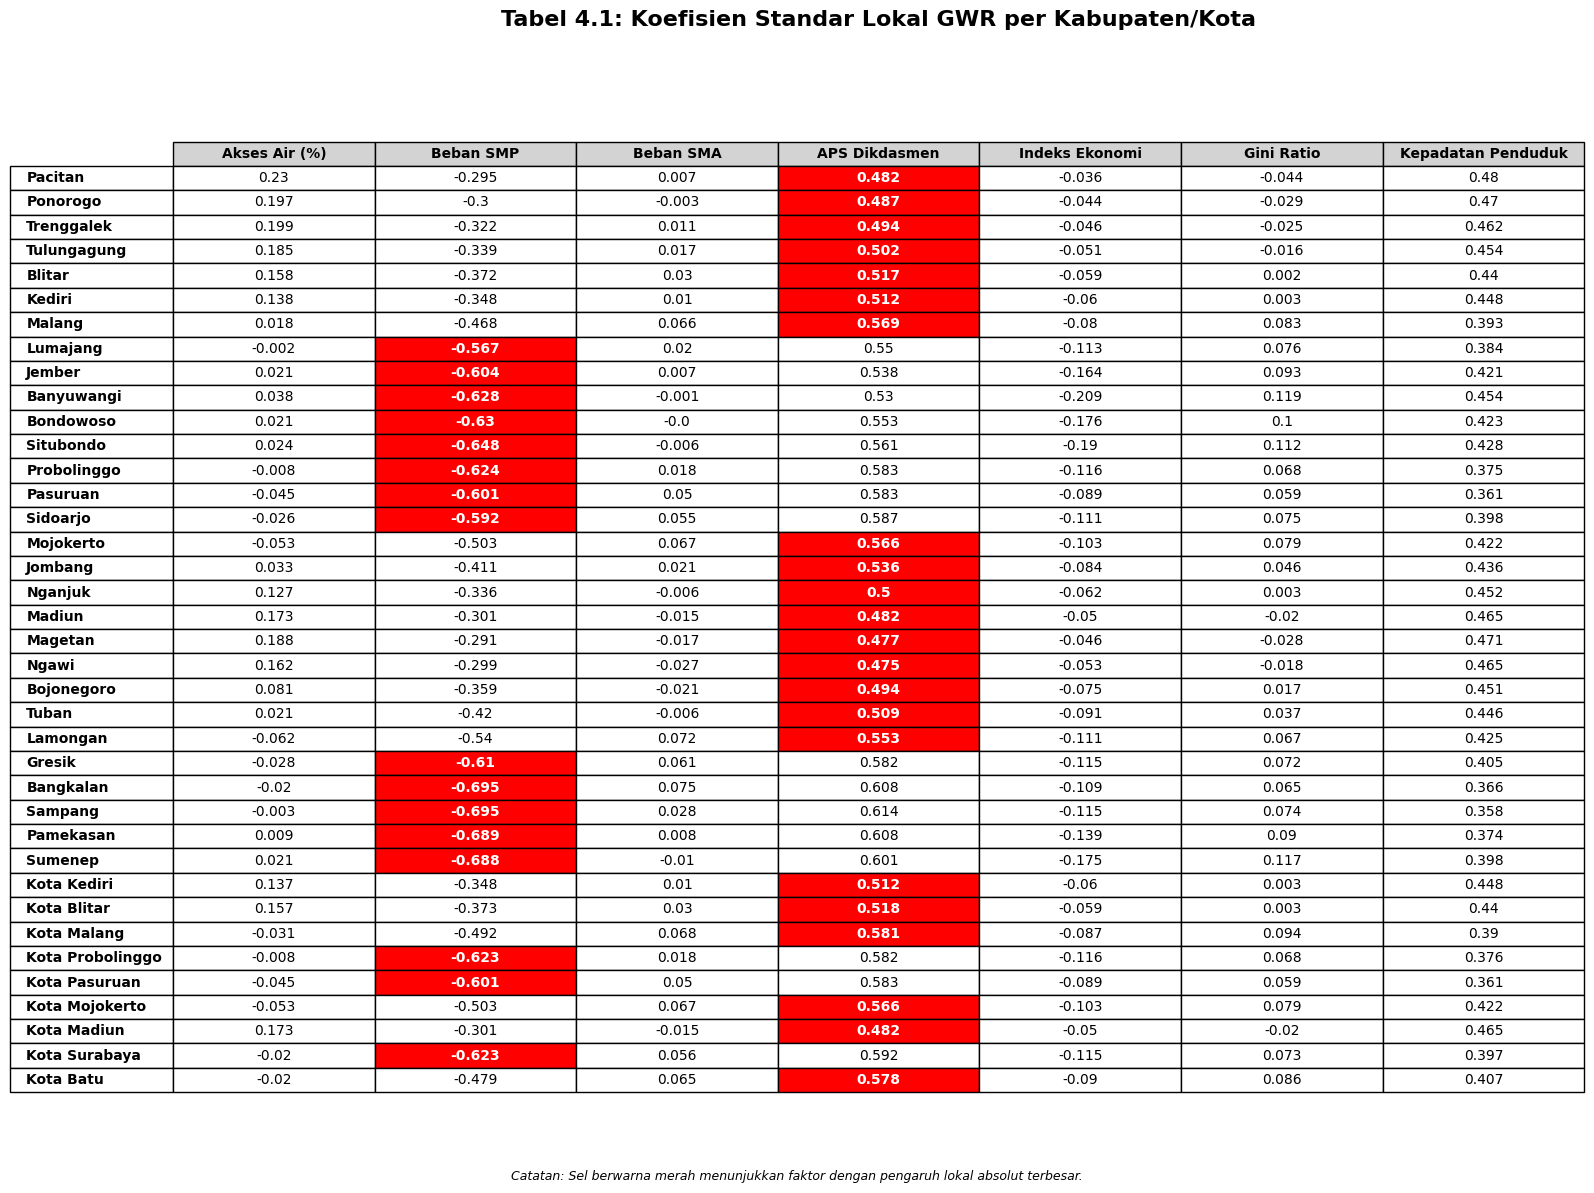


Gambar tabel koefisien GWR telah dibuat dan ditampilkan.


In [ ]:
short_col_names = {
    'Persentase Rumah Tangga dengan Akses Air Bersih': 'Akses Air (%)',
    'BebanSiswaPerSekolah_SMP': 'Beban SMP',
    'BebanSiswaPerSekolah_SMA': 'Beban SMA',
    'APS_Pendidikan_Dasar_Menengah': 'APS Dikdasmen',
    'IndeksDayaDukungEkonomi': 'Indeks Ekonomi',
    'Gini Ratio': 'Gini Ratio',
    'Kepadatan Penduduk per km persegi (km²)': 'Kepadatan Penduduk',
}

# 2. Ekstrak koefisien (kolom 1 dst., karena kolom 0 adalah intercept)
# Pastikan X_scaled atau data input GWR Anda tidak termasuk intercept di sini
local_coeffs_only = gwr_results_final.params[:, 1:]

# 3. Dapatkan nama fitur sesuai urutan koefisien
feature_names_gwr = selected_features # Pastikan list ini urutannya benar

# 4. Cari indeks kolom faktor dominan untuk setiap baris
# np.argmax(np.abs(...)) akan memberikan indeks dari nilai absolut terbesar
dominant_col_indices = np.argmax(np.abs(local_coeffs_only), axis=1)

# 5. Siapkan data untuk tabel matplotlib
table_data = np.round(local_coeffs_only, 3) # Bulatkan koefisien
table_col_labels = [short_col_names.get(name, name) for name in feature_names_gwr]
row_labels = dfgwr['Kabupaten/Kota'].values # Ambil nama kabupaten/kota

# --- BAGIAN 2: VISUALISASI TABEL MATPLOTLIB ---

fig, ax = plt.subplots(figsize=(16, 12)) # Sesuaikan ukuran jika perlu
ax.axis('off')
ax.set_title('Tabel 4.1: Koefisien Standar Lokal GWR per Kabupaten/Kota', fontsize=16, pad=20, weight='bold') # Judul tabel

# Buat tabel
the_table = ax.table(cellText=table_data,
                     colLabels=table_col_labels,
                     rowLabels=row_labels,
                     loc='center',
                     cellLoc='center')

# Atur font size dan skala tabel
the_table.auto_set_font_size(False)
the_table.set_fontsize(10) # Sesuaikan font size
the_table.scale(1.1, 1.2) # Sesuaikan skala

# Atur alignment header kolom
for (row, col), cell in the_table.get_celld().items():
    if row == 0: # Header
        cell.set_text_props(weight='bold')
        cell.set_facecolor('lightgrey') # Warna header
        cell.set_edgecolor('black')
    if row > 0 and col == -1: # Label baris (Kab/Kota)
         cell.set_text_props(ha='left', weight='bold') # Rata kiri label baris
         cell.set_edgecolor('black')
    if row > 0 and col >= 0: # Data koefisien
        cell.set_edgecolor('black')

# Logika highlight
highlight_color = 'red' # Warna highlight
for i in range(len(table_data)):
    dominant_col_index = dominant_col_indices[i]

    # Beri warna pada sel faktor dominan
    cell = the_table.get_celld()[(i + 1, dominant_col_index)]
    cell.set_facecolor(highlight_color)
    cell.set_text_props(weight='bold', color='white') # Teks putih agar kontras

# Tambahkan catatan kaki (opsional)
plt.figtext(0.5, 0.01, 'Catatan: Sel berwarna merah menunjukkan faktor dengan pengaruh lokal absolut terbesar.',
            ha='center', va='bottom', fontsize=9, style='italic')

fig.tight_layout()

# Simpan gambar (jika diperlukan untuk laporan)
plt.savefig('tabel_koefisien_gwr.png', dpi=150, bbox_inches='tight') # Simpan sebagai PNG

plt.show()

print("\nGambar tabel koefisien GWR telah dibuat dan ditampilkan.")

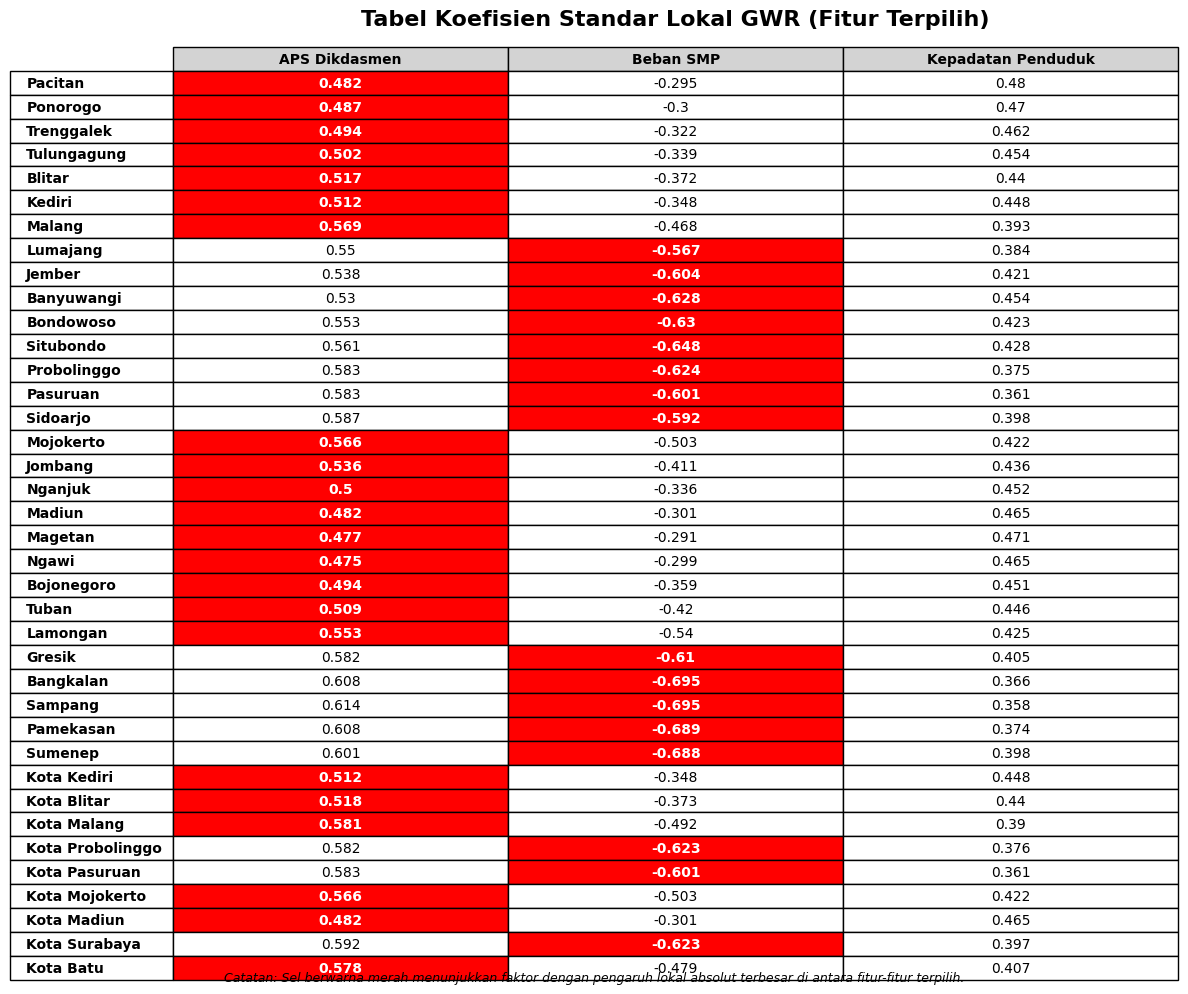


Gambar tabel koefisien GWR (fitur terpilih) telah dibuat dan ditampilkan.


In [ ]:
# Filter to include only the requested features
requested_features = [
    'APS_Pendidikan_Dasar_Menengah',
    'BebanSiswaPerSekolah_SMP',
    'Kepadatan Penduduk per km persegi (km²)'
]

# Get the indices of the requested features in the original feature_names_gwr list
requested_indices = [feature_names_gwr.index(f) for f in requested_features]

# Filter the local coefficients and feature names based on the requested indices
local_coeffs_filtered = local_coeffs_only[:, requested_indices]
feature_names_filtered = [feature_names_gwr[i] for i in requested_indices]

# 4. Find the index of the dominant factor column for each row within the *filtered* coefficients
# We need to find the dominant factor among the *selected* features for each location
dominant_col_indices_filtered = np.argmax(np.abs(local_coeffs_filtered), axis=1)


# 5. Prepare data for the matplotlib table
table_data = np.round(local_coeffs_filtered, 3) # Round the filtered coefficients
table_col_labels = [short_col_names.get(name, name) for name in feature_names_filtered]
row_labels = dfgwr['Kabupaten/Kota'].values # Get the district/city names

# --- BAGIAN 2: VISUALISASI TABEL MATPLOTLIB ---

fig, ax = plt.subplots(figsize=(12, 10)) # Adjust size if needed
ax.axis('off')
ax.set_title('Tabel Koefisien Standar Lokal GWR (Fitur Terpilih)', fontsize=16, pad=20, weight='bold') # Table title

# Create the table
the_table = ax.table(cellText=table_data,
                     colLabels=table_col_labels,
                     rowLabels=row_labels,
                     loc='center',
                     cellLoc='center')

# Set font size and table scale
the_table.auto_set_font_size(False)
the_table.set_fontsize(10) # Adjust font size
the_table.scale(1.1, 1.2) # Adjust scale

# Set column header alignment
for (row, col), cell in the_table.get_celld().items():
    if row == 0: # Header
        cell.set_text_props(weight='bold')
        cell.set_facecolor('lightgrey') # Header color
        cell.set_edgecolor('black')
    if row > 0 and col == -1: # Row labels (Kab/Kota)
         cell.set_text_props(ha='left', weight='bold') # Left align row labels
         cell.set_edgecolor('black')
    if row > 0 and col >= 0: # Coefficient data
        cell.set_edgecolor('black')

# Highlight logic for the *filtered* table
highlight_color = 'red' # Highlight color
for i in range(len(table_data)):
    dominant_col_index = dominant_col_indices_filtered[i]

    # Color the dominant factor cell
    cell = the_table.get_celld()[(i + 1, dominant_col_index)]
    cell.set_facecolor(highlight_color)
    cell.set_text_props(weight='bold', color='white') # White text for contrast

# Add footnote (optional)
plt.figtext(0.5, 0.01, 'Catatan: Sel berwarna merah menunjukkan faktor dengan pengaruh lokal absolut terbesar di antara fitur-fitur terpilih.',
            ha='center', va='bottom', fontsize=9, style='italic')

fig.tight_layout()

# Save image (if needed for reporting)
plt.savefig('tabel_koefisien_gwr_filtered.png', dpi=150, bbox_inches='tight') # Save as PNG

plt.show()

print("\nGambar tabel koefisien GWR (fitur terpilih) telah dibuat dan ditampilkan.")